In [1]:
from universal_format import UniversalFormat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
f = '/home/mcormier/git/divan/tests/64065_NMC532-AG_55C_43V/jim_cyc_64065_nW_C0_43V_55c_170202_2vcdtd_300_945_BESTFORGRAPH_20_1.txt'

In [3]:
data = UniversalFormat(f)

Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']


In [4]:
t, dis_cap = data.get_discap(rate='C/20', x_var='time', normcyc=3)

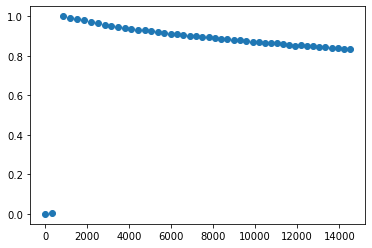

In [5]:
plt.plot(t, dis_cap, "o")

In [6]:
def model(t, A, B):
    return 1 - A*t**(1/2) - B*t

In [7]:
t, dis_cap = t[2:], dis_cap[2:]

In [8]:
popt, pcov = curve_fit(model, t, dis_cap, method='trf', max_nfev=5000,
                       ftol=1e-14, xtol=None, gtol=None)
print("A = {0:.8f}, B = {1:.10f}".format(popt[0], popt[1]))

A = 0.00039738, B = 0.0000086545


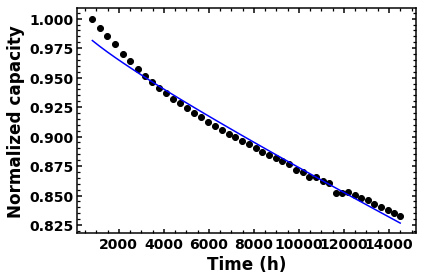

In [11]:
with plt.style.context('grapher'):
    plt.plot(t, dis_cap, "o")
    plt.plot(t, model(t, popt[0], popt[1]))
    plt.xlabel('Time (h)')
    plt.ylabel('Normalized capacity')
    #plt.ylim(0, 1)